In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from MinorityGameComplex import GameSimulationImitationTermal

In [18]:
dynamic_times = np.logspace(0,4.3,11).astype(int)

In [19]:
dynamic_times

array([    1,     2,     7,    19,    52,   141,   380,  1023,  2754,
        7413, 19952])

In [35]:
S=2
M=7
N=381
Ncop=380
dynT=2500
T=10000000
ponderas = 1
imprime = 1
print('alpha={:.4f}'.format(2**M/N))
meangains=np.zeros(T)
meangainimi=np.zeros(T)
for i in range(ponderas):
    A, G, GC = GameSimulationImitationTermal(S, M, N, Ncop, T, dynT)
    for t in range(T):
        if t<10000:
            meangains[t] += np.mean(G[:(t+1)])
            meangainimi[t] += np.mean(GC[:(t+1)])
        else:
            meangains[t] += np.mean(G[(t-9999):t])
            meangainimi[t] += np.mean(GC[(t-9999):t])
    if (i+1)%imprime==0:
        print(' - Pondera nº{}/{}'.format(i+1,ponderas))
        print('          <g(T)> = {}'.format(meangains[-1]/(i+1)))
        print('        <g_I(T)> = {}'.format(meangainimi[-1]/(i+1)))
meangains = meangains/ponderas
meangainimi = meangainimi/ponderas

alpha=0.3360


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/raymun/.local/share/virtualenvs/Documentos-R9YD94Vv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-35-c564ab50cac8>", line 13, in <module>
    A, G, GC = GameSimulationImitationTermal(S, M, N, Ncop, T, dynT)
  File "/home/raymun/Documentos/Minority_Game/Minority-Game/SimulationsResults 2on/MinorityGameComplex.py", line 495, in GameSimulationImitationTermal
    A_t[t] = A
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/raymun/.local/share/virtualenvs/Documentos-R9YD94Vv/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2033, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occu

KeyboardInterrupt: 

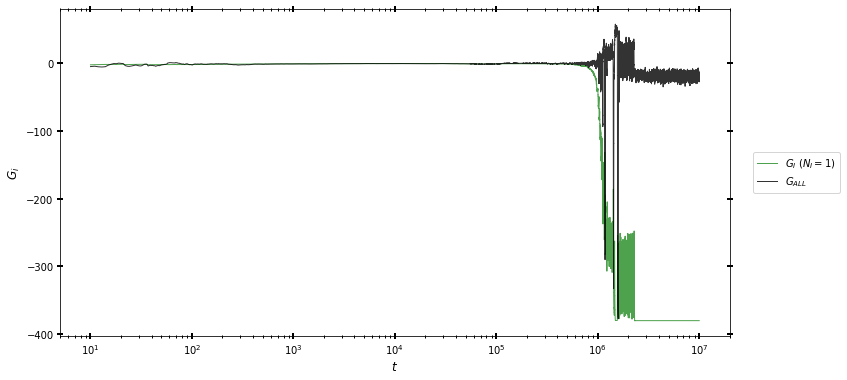

In [34]:
fig, ax = plt.subplots(1, figsize=(12,6))
ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_ylim([-5,-1])

ax.set_xlabel(r'$t$', fontsize='large')
ax.set_ylabel(r'$G_i$', fontsize='large')

ax.tick_params(which='minor', direction = 'inout', length=3, width=1,
              labelbottom=False, labeltop=False, labelleft=False, labelright=False,
                  bottom=True, top=True, left=True, right=True)

ax.tick_params(which='major', direction = 'inout', length=6, width = 2,
                  labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                  bottom=True, top=True, left=True, right=True)

cols = ['dodgerblue', 'yellowgreen', 'crimson', 'forestgreen', 'cyan', 'darkblue']

lin12, = ax.plot(np.arange(10,T-1), meangainimi[10:-1], lw=1, ls = '-', color = cols[3], alpha=.8)
lin101, = ax.plot(np.arange(10,T-1), meangains[10:-1], lw=1, ls = '-', color = 'k', alpha=.8)

"""xticks1 = [0.1, 1, 10]
ax.set_xticks(xticks1)
ax.set_xticklabels([str(i) for i in xticks1])"""

#ax.axhline(y=0, xmin=0, xmax=1, color='k', alpha=0.7, linestyle='--')
#for i in range(int(T/dynT)-1):
#    ax.axvline(x=dynT*(i+1), linestyle='--', lw=.5, color='k', alpha=.5)

labels = [r'$G_{I}$ ($N_I=1$)', r'$G_{ALL}$']
ax.legend([(lin12,), (lin101,) ], labels, loc='center', bbox_to_anchor=[1.1,0.5])